Bejaia Region=0
Sidi-Bel Abbes Region=1

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [217]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [218]:
df.isnull().sum()

day                              0
 month                           0
 year                            0
 Temperature                     0
 RH                              0
 Ws                              0
 Rain                            0
 FFMC                            0
 DMC                             0
 DC                              0
 ISI                             0
 BUI                             0
 FWI                             0
 Classes                         0
dtype: int64

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   day                            246 non-null    object
 1    month                         246 non-null    object
 2    year                          246 non-null    object
 3    Temperature                   246 non-null    object
 4    RH                            246 non-null    object
 5    Ws                            246 non-null    object
 6    Rain                          246 non-null    object
 7    FFMC                          246 non-null    object
 8    DMC                           246 non-null    object
 9    DC                            246 non-null    object
 10   ISI                           246 non-null    object
 11   BUI                           246 non-null    object
 12   FWI                           246 non-null    object
 13   Clas

In [220]:
df.columns

Index(['day                          ', ' month', ' year', ' Temperature',
       ' RH', ' Ws', ' Rain', ' FFMC', ' DMC ', ' DC    ', ' ISI ', ' BUI ',
       ' FWI ', ' Classes'],
      dtype='object')

In [221]:
df.columns=df.columns.str.strip()

In [222]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [223]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [224]:
df=df.dropna().reset_index(drop=True)

In [225]:
df.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                       
year                                        
Temperature                                 
RH                                          
Ws                                          
Rain                                        
FFMC                                        
DMC                                         
DC                                          
ISI                                         
BUI                                         
FWI                                         
Classes                                     
Name: 122, dtype: object

In [226]:
df=df.drop(122).reset_index(drop=True)

In [227]:
df.iloc[122]

day            day                          
month                                  month
year                                    year
Temperature                      Temperature
RH                                        RH
Ws                                        Ws
Rain                                    Rain
FFMC                                    FFMC
DMC                                     DMC 
DC                                    DC    
ISI                                     ISI 
BUI                                     BUI 
FWI                                     FWI 
Classes                              Classes
Name: 122, dtype: object

In [228]:
df=df.drop(122).reset_index(drop=True)

In [229]:
df.iloc[122]

day            1                            
month                                  6    
year                                    2012
Temperature                      32         
RH                                        71
Ws                                        12
Rain                                    0.7 
FFMC                                    57.1
DMC                                     2.5 
DC                                    8.2   
ISI                                     0.6 
BUI                                     2.8 
FWI                                     0.2 
Classes                             not fire
Name: 122, dtype: object

In [230]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244,244,244,244,244,244,244,244,244,244,244,244,244,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,126,3
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,137


In [231]:
df.iloc[122]

day            1                            
month                                  6    
year                                    2012
Temperature                      32         
RH                                        71
Ws                                        12
Rain                                    0.7 
FFMC                                    57.1
DMC                                     2.5 
DC                                    8.2   
ISI                                     0.6 
BUI                                     2.8 
FWI                                     0.2 
Classes                             not fire
Name: 122, dtype: object

In [232]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [233]:
df.tail(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [234]:
df['Region']=df['Region'].astype(int)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [236]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day'	,'month','year','Temperature'	,'RH','Ws']].astype(int)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.7+ KB


In [238]:
df.columns[0]

'day'

In [239]:
float_cols=[features for features in df.columns if df[features].dtypes=='O']
float_cols

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [240]:
float_cols=float_cols[:-1]
float_cols

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [241]:
df['Classes'].unique()

array([' not fire', ' fire', ' '], dtype=object)

In [242]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [243]:
float_cols=['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [244]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [245]:
df[df['FWI']=='fire']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [246]:
df=df.drop(165).reset_index(drop=True)

In [247]:
df[df['FWI']=='fire']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [248]:
for data in float_cols:
   df[data]=df[data].astype(str)
   df[data]=df[data].str.replace(' ','',regex=False)
   df[data]=df[data].astype(float)
   

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [250]:
df['Classes'].unique()

array([' not fire', ' fire'], dtype=object)

In [251]:
df['Classes']=df['Classes'].str.strip()

In [252]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [253]:
for data in df.columns:
   print(f'{data} = {df[data].unique()}')
   print()

day = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

month = [6 7 8 9]

year = [2012]

Temperature = [29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]

RH = [57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]

Ws = [18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]

Rain = [ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3  0.1  0.4  1.
  1.4  0.8 16.8  7.2 10.1  3.8  0.9  1.8  4.6  8.3  5.8  4.   2.   4.7
  8.7  4.5  1.1  1.7  2.2  6.   1.9  2.9  4.1  6.5  4.4]

FFMC = [65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2 84.5 84.  50.  59.
 49.4 36.1 37.3 56.9 79.9 59.8 81.  79.1 81.4 85.9 86.7 86.8 89.  89.1
 88.7 59.9 55.7 63.1 80.1 87.  80.  85.6 66.6 81.1 75.1 81.8 73.9 60.7
 72.6 82.8 85.4 88.1 73.4 68.2 70.  84.3 89.2 90.3 86.5 87.2 78.8 78.
 76.6 85.  86.4 77.1 87.4 88.9 81.3 

In [254]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [255]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['Classes']=label_encoder.fit_transform(df[['Classes']])

In [256]:
df['Classes'].value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

In [257]:
df.to_csv('Algerian_Forest_Fire_Clean_Dataset.csv',index=False)

EDA

<Axes: >

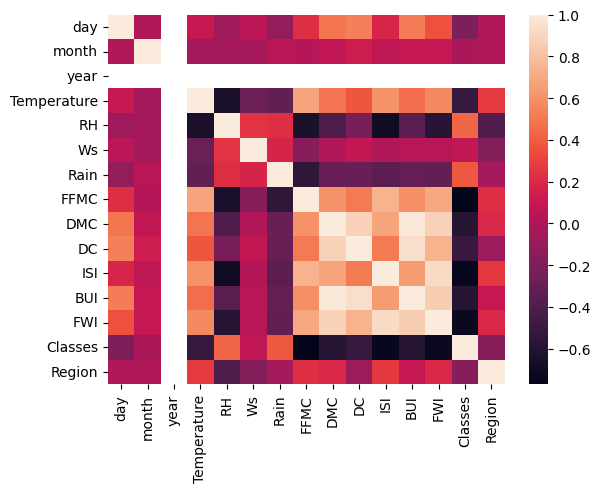

In [258]:
sns.heatmap(df.corr())

FE and Model training

In [259]:
df1=pd.read_csv('Algerian_Forest_Fire_Clean_Dataset.csv')
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [260]:
df1=df1.drop(['day','month','year'],axis=1)

In [262]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [263]:
X=df1.drop('FWI',axis=1)
y=df1['FWI']

In [265]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,1,0


In [266]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [270]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train_after_scaled')

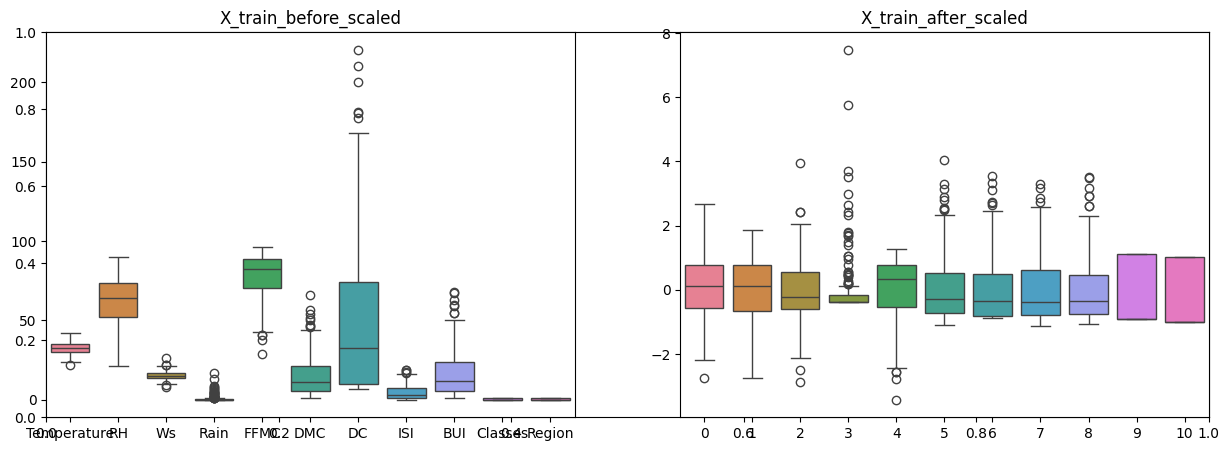

In [273]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train_before_scaled')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train_after_scaled')

In [280]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def checkMetrics(y_test,y_pred):
   mae=mean_absolute_error(y_test,y_pred)
   mse=mean_squared_error(y_test,y_pred)
   rmse=np.sqrt(mse)
   score=r2_score(y_test,y_pred)
   print('..ERROR Calculations..')
   print('MAE:',mae)
   print('MSE:',mse)
   print('RMSE:',rmse)

   print('..Score Calculations..')
   print('R2_Score',score)

In [281]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
linear_reg.fit(X_train_scaled,y_train)
y_pred=linear_reg.predict(X_test_scaled)

In [282]:
checkMetrics(y_test,y_pred)

..ERROR Calculations..
MAE: 0.46544608000940846
MSE: 0.46982435716885157
RMSE: 0.685437347369438
..Score Calculations..
R2_Score 0.9893850294922101


..ERROR Calculations..
MAE: 1.0816323165898813
MSE: 2.000058348289227
RMSE: 1.4142341914581287
..Score Calculations..
R2_Score 0.9548117077009715


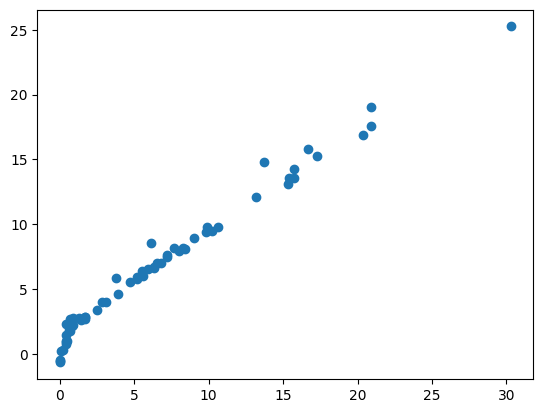

In [284]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
checkMetrics(y_test,y_pred)
plt.scatter(y_test,y_pred)

..ERROR Calculations..
MAE: 0.5053525521628113
MSE: 0.5599752461373929
RMSE: 0.7483149378018542
..Score Calculations..
R2_Score 0.9873482065539131


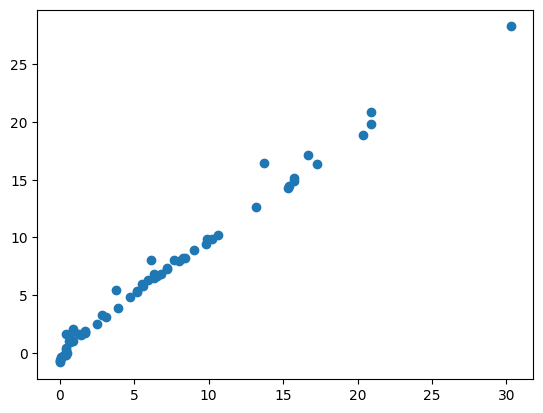

In [285]:
from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
checkMetrics(y_test,y_pred)
plt.scatter(y_test,y_pred)

..ERROR Calculations..
MAE: 0.503285697341681
MSE: 0.5677317795293472
RMSE: 0.7534797804382989
..Score Calculations..
R2_Score 0.987172959417527


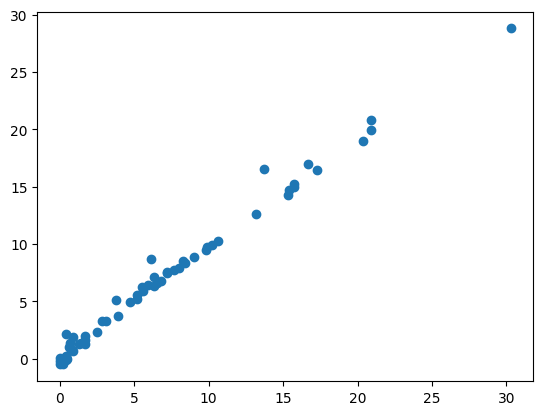

In [286]:
from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
checkMetrics(y_test,y_pred)
plt.scatter(y_test,y_pred)

Pickle Model

In [288]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgecv,open('ridge.pkl','wb'))

